In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\asith\Downloads\Average Number of Jobs within a 30 Minute Public Transit correlated with Walkability Index.csv')

In [3]:
df.head()

,SHID,Geography,Average Number of Jobs within a 30 Minute Public Transit,Walkability Index
0,country:us/tract:48441011400,Tract 48441011400,3247.403361,10.2309
1,country:us/tract:48441011300,Tract 48441011300,4946.726027,8.6980
2,country:us/tract:48441013300,Tract 48441013300,367.342697,6.6839
3,country:us/tract:48441011700,Tract 48441011700,8379.636943,12.2145
4,country:us/tract:48441012900,Tract 48441012900,77.827586,6.0000


In [4]:
df.shape

(37, 4)

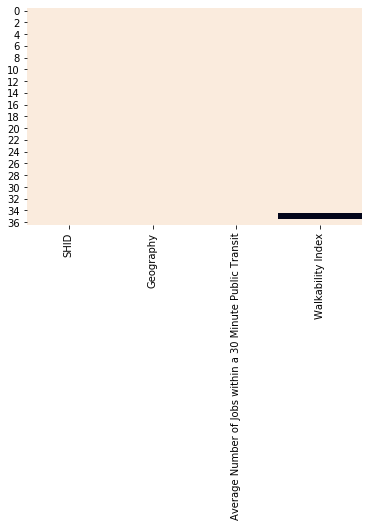

In [5]:
sns.heatmap(df.notnull(),cbar=False)

In [6]:
df_wi=df.fillna(df['Walkability Index'].mean())

In [7]:
df_wi.drop(['SHID','Geography'],inplace=True,axis=1)

In [8]:
df_wi.describe()

,Average Number of Jobs within a 30 Minute Public Transit,Walkability Index
count,37.000000,37.000000
mean,3634.749763,8.279003
std,2839.136132,2.349236
min,27.285714,2.000000
25%,1125.644444,6.630700
50%,3861.983193,8.100400
75%,5021.626087,10.230900
max,9585.722772,13.333000


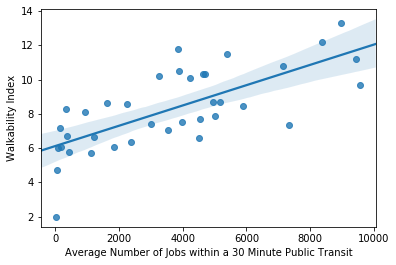

In [9]:
sns.regplot(df_wi['Average Number of Jobs within a 30 Minute Public Transit'],df_wi['Walkability Index'])

In [10]:
corr=df_wi.corr()

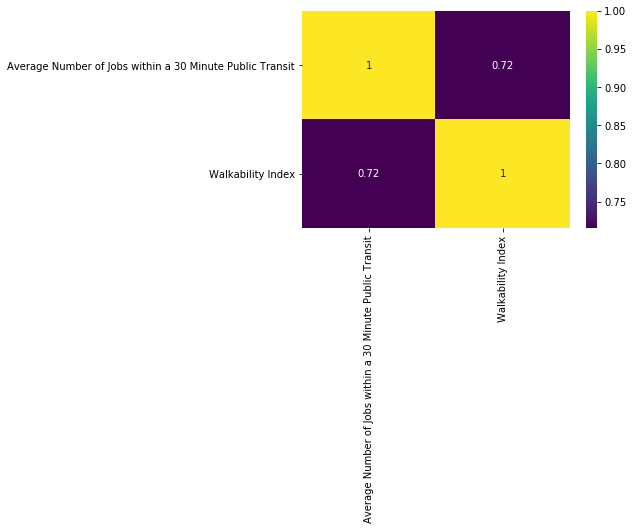

In [11]:
sns.heatmap(corr,cmap='viridis',annot=True)

In [12]:
df_wi.rename(columns={'Average Number of Jobs within a 30 Minute Public Transit':'Average_Number_of_Jobs',
                      'Walkability Index':'Walkability_Index'},inplace=True)

## 1st method

In [13]:
x=df_wi.iloc[:,:-1]

y=df_wi.iloc[:,1]

In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [16]:
lr_model=LinearRegression(normalize=True)

lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 1.0, 'Walkability Index Vs. Average Number of Jobs (Training set)')

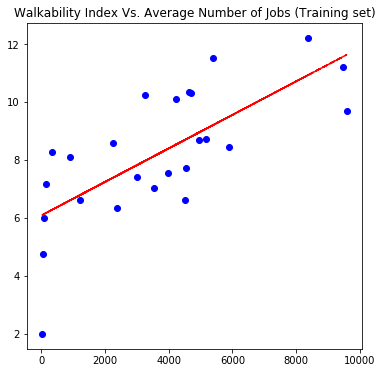

In [17]:
plt.figure(figsize=(6,6))

plt.scatter(X_train,y_train,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red',linestyle = "--" )

plt.title('Walkability Index Vs. Average Number of Jobs (Training set)')

Text(0.5, 1.0, 'Walkability Index Vs. Average Number of Jobs (Test set)')

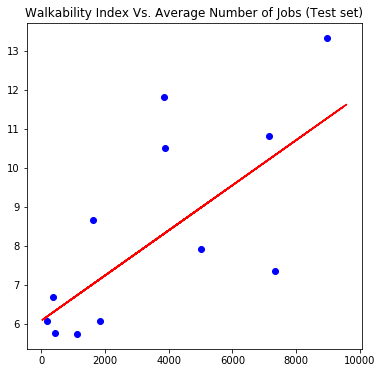

In [18]:
plt.figure(figsize=(6,6))

plt.scatter(X_test,y_test,color='blue')

plt.plot(X_train,lr_model.predict(X_train),color='red')

plt.title('Walkability Index Vs. Average Number of Jobs (Test set)')

In [19]:
print(lr_model.intercept_)

print(lr_model.coef_)

6.081127645571723
[0.00057825]


In [20]:
from sklearn.metrics import r2_score

In [21]:
lr_model.score(X_test, y_test)

0.5103932271340224

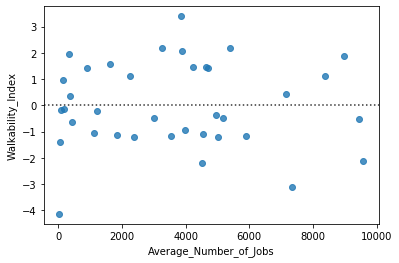

In [22]:
sns.residplot(df_wi['Average_Number_of_Jobs'],df_wi['Walkability_Index'])

### 2nd method

In [23]:
import statsmodels.api as sm

from statsmodels.formula.api import ols

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [24]:
model = ols("Walkability_Index ~ Average_Number_of_Jobs", data=df_wi).fit()

In [25]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Walkability_Index   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     36.65
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.56e-07
Time:                        22:22:55   Log-Likelihood:                -70.342
No. Observations:                  37   AIC:                             144.7
Df Residuals:                      35   BIC:                             147.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6

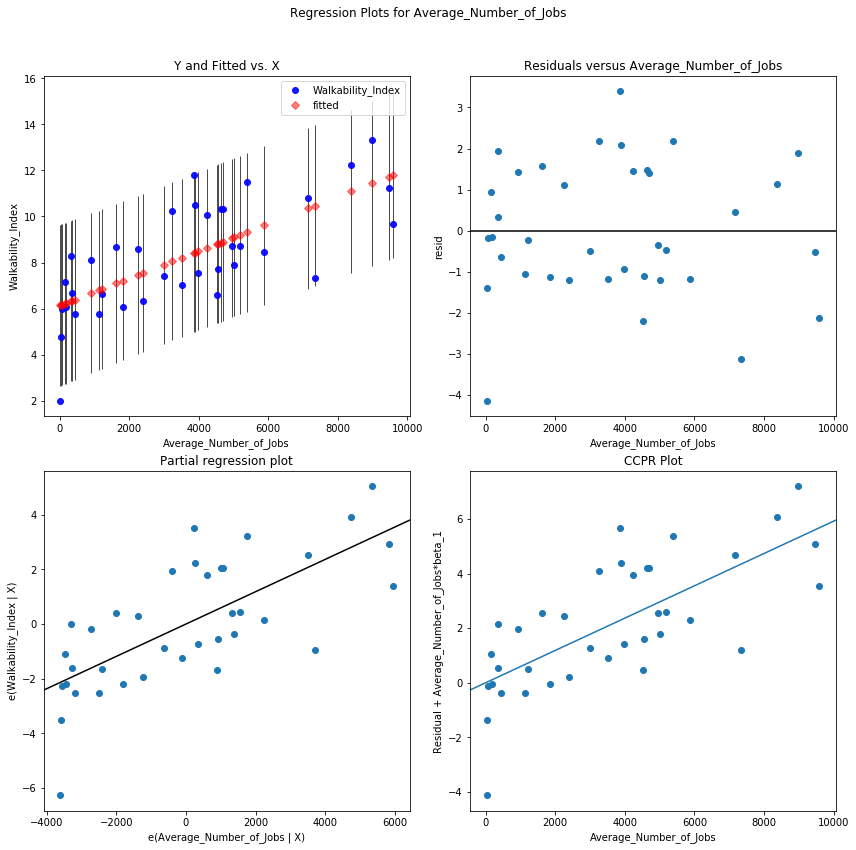

In [26]:
fig = plt.figure(figsize=(12,12))

fig = sm.graphics.plot_regress_exog(model, "Average_Number_of_Jobs", fig=fig)

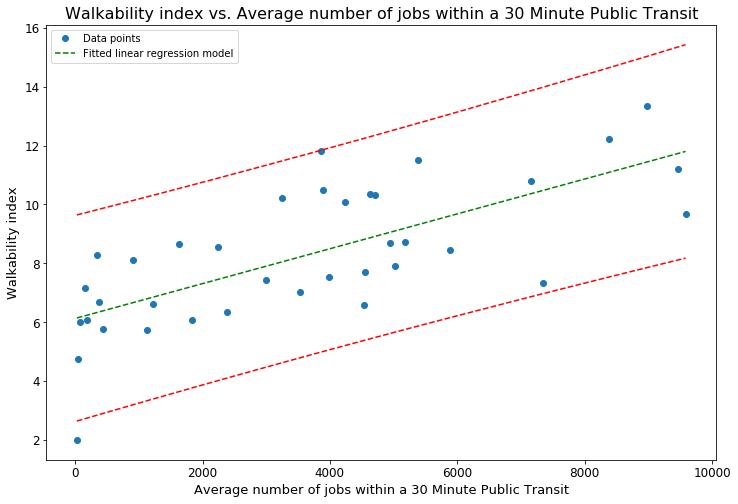

In [29]:
x = df_wi['Average_Number_of_Jobs']

y = df_wi['Walkability_Index']

_,interval_l, interval_u=wls_prediction_std(model)

data_intervals = {'x_1': x,'y_1':y,'model_fittedvalues_1':model.fittedvalues, 'interval_lo': interval_l, 'interval_up':interval_u}

df_intervals = pd.DataFrame(data=data_intervals)

df_intervals_sort = df_intervals.sort_values(by='x_1')

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(df_intervals_sort.x_1, df_intervals_sort.y_1, 'o', label="Data points")

ax.plot(df_intervals_sort.x_1, df_intervals_sort.model_fittedvalues_1, 'g--', label="Fitted linear regression model")

ax.plot(df_intervals_sort.x_1,df_intervals_sort.interval_lo,'r--')

ax.plot(df_intervals_sort.x_1,df_intervals_sort.interval_up, 'r--')

ax.set_xlabel('Average number of jobs within a 30 Minute Public Transit',fontsize=13)

ax.set_ylabel('Walkability index',fontsize=13)

ax.set_title('Walkability index vs. Average number of jobs within a 30 Minute Public Transit',fontsize=16)

plt.tick_params(labelsize=12)

ax.legend(loc='best');
